In [1]:
"""
Python 3.10 Titanic Exploratory Data Analysis and visualization program will you survive on the titanic or not
File name Titanic_eda.py

Version: 0.1
Author: MLCV
Date: 2023-07-14
"""

# Importing Libraries
# visualization
from plotnine import *  # plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot.
import matplotlib.pyplot as plt  # collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns  # statistical data visualization

# data analysis
import pandas as pd  # is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language
import numpy as np  # offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more

import warnings  # Base category for warnings triggered during the process of importing a module (ignored by default)
warnings.filterwarnings('ignore')  # here we prescribe the action in case of an error.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [3]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [4]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')  
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_all = concat_df(df_train, df_test)

In [5]:
df_train.name = 'Training Set' 
df_test.name = 'Test Set'
df_all.name = 'All Set' 
dfs = [df_train, df_test]

In [6]:
# display information about datasets
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))

Number of Training Examples = 891
Number of Test Examples = 418



In [7]:
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418



In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q


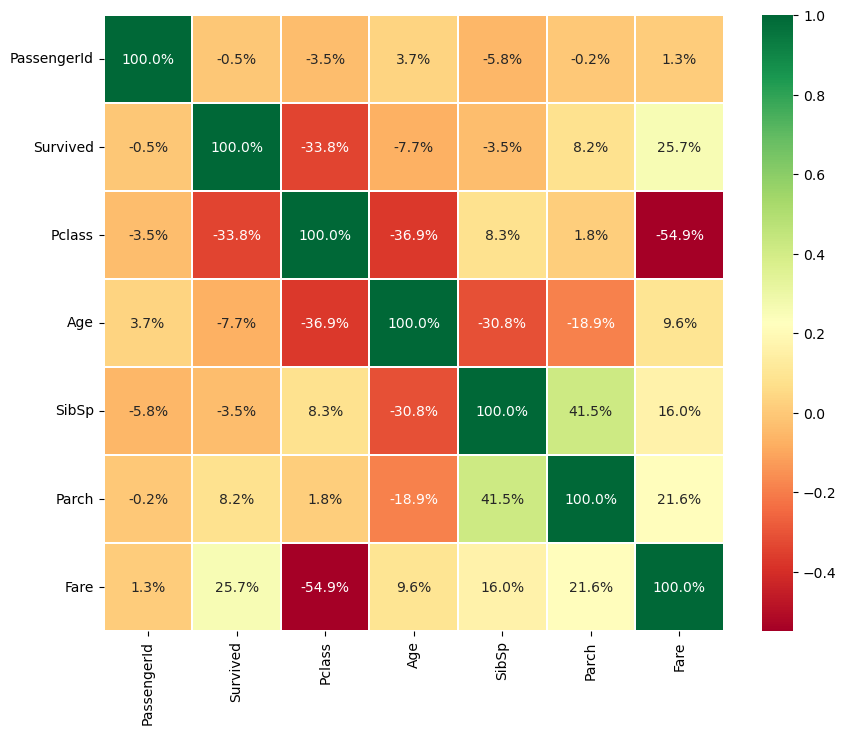

In [13]:
'''Correlation Between The Features'''
sns.heatmap(df_train.corr(),annot=True, cmap='RdYlGn', linewidths=0.2, fmt = "0.1%")
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()        

In [14]:
# function to analyze each column of the dataframe
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [15]:
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




# Working on Sex

In [16]:
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

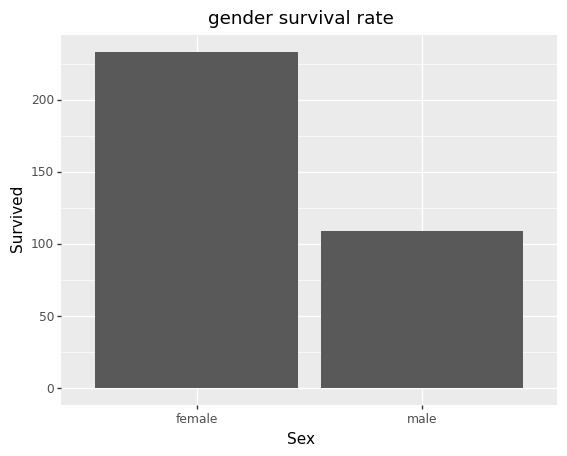

<ggplot: (8650176477719)>

In [18]:
(ggplot(df_train)
 + aes(x = 'Sex', y = 'Survived')
 + geom_col()
 + ggtitle('gender survival rate')
 + theme(text = element_text(family = 'NanumBarunGothic'))
)

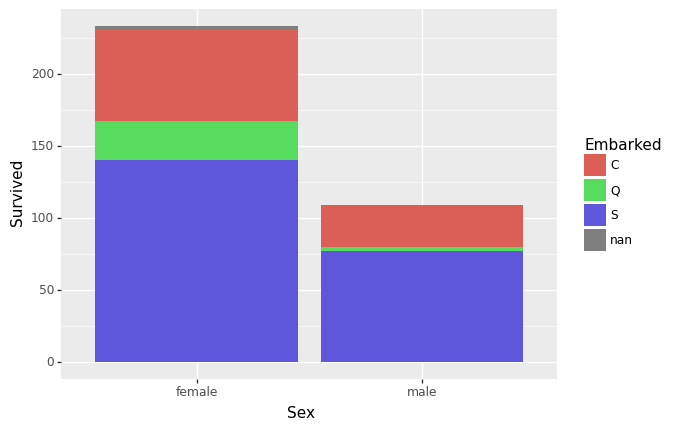

<ggplot: (8650176507298)>

In [19]:
(ggplot(df_train)
 + aes(x = 'Sex', y = 'Survived', fill = 'Embarked')
 + geom_col()
)

* The number of men on the ship is lot more than the number of women. 
* Still the number of women saved is almost twice the number of males saved. 
* The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

# Working on the Pclass

In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
df_train['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
# Changing the Pclass to string
df_train['Pclass'] = df_train['Pclass'].astype('str')

pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


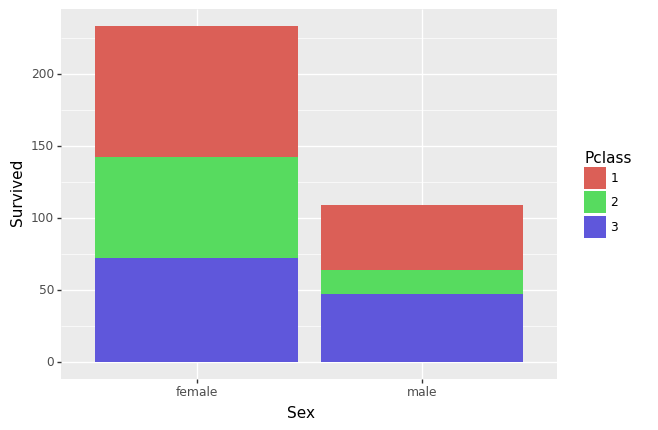

<ggplot: (8650176592161)>

In [23]:
(ggplot(df_train)
 + aes(x='Sex', y='Survived', fill='Pclass')
 + geom_col()
)

* Passenegers Of Pclass1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

* For Pclass1 %survived is around 63% while for Pclass2 is around 48%.

* The survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

* It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

# Working with Age

In [24]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [25]:
df_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [26]:
train_dropna_age = df_train['Age'].dropna()

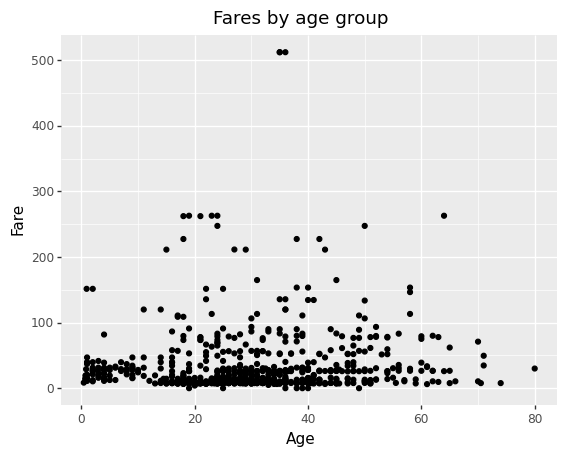

<ggplot: (8650173461378)>

In [27]:
(ggplot(df_train)
 + aes(x='Age', y='Fare')
 + geom_point()
 + ggtitle('Fares by age group')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [28]:
df_train['Survived'] = df_train['Survived'].astype('category')

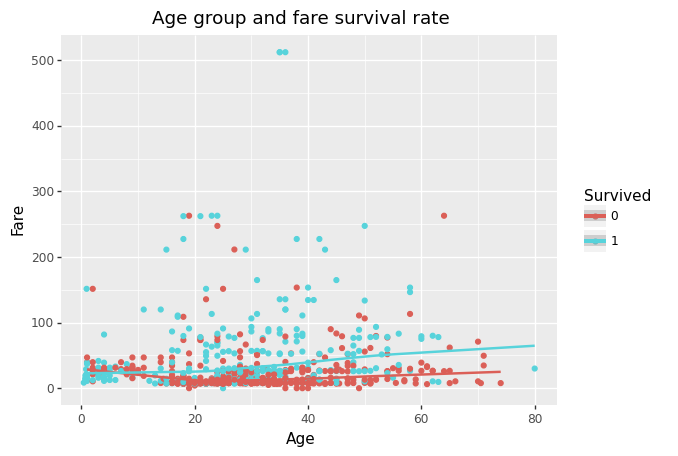

<ggplot: (8650173271092)>

In [29]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + ggtitle('Age group and fare survival rate')
 + theme(text=element_text(family='NanumBarunGothic'))
)

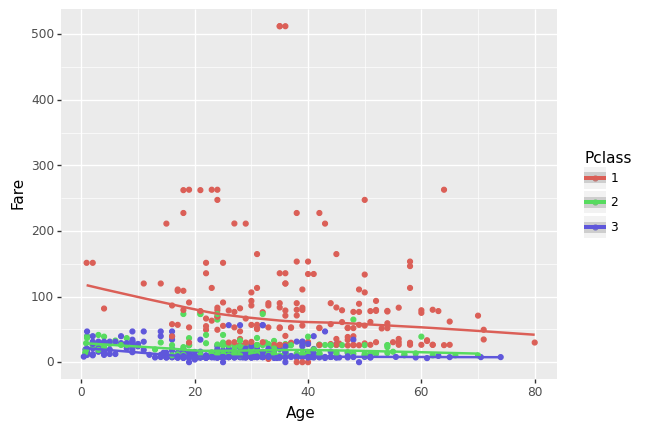

<ggplot: (8650167909331)>

In [30]:
# Is there a correlation between age and Pclass?
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Pclass')
 + geom_point()
 + stat_smooth()
)

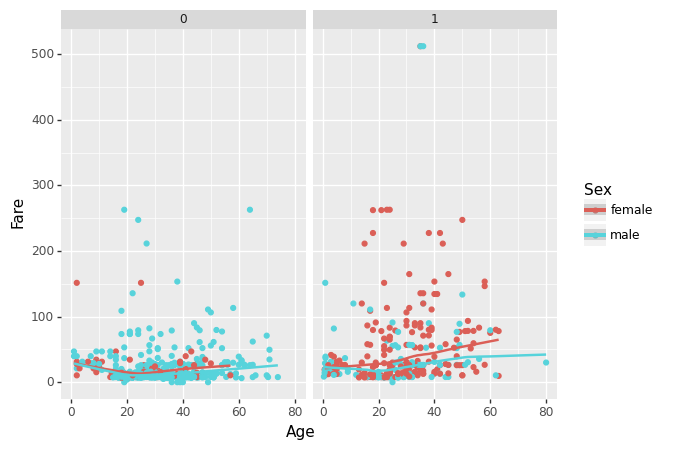

<ggplot: (8650173271932)>

In [31]:
(ggplot(df_train) 
 + aes(x='Age', y='Fare', color='Sex')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~Survived')
)

In [32]:
# Although it is a number, it is changed to a category because it is categorical data
df_train['Survived'] = df_train['Survived'].astype('category')

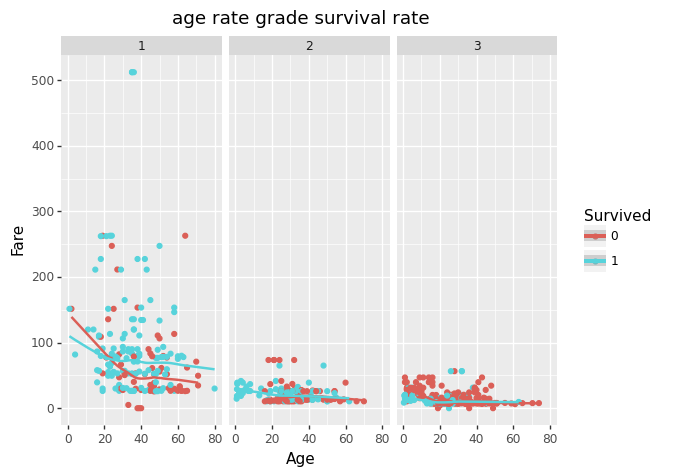

<ggplot: (8650167721903)>

In [33]:
# See the correlation between age and fare gender
(ggplot(df_train) 
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~Pclass')
 + ggtitle('age rate grade survival rate')
 + theme(text=element_text(family='NanumBarunGothic'))
)

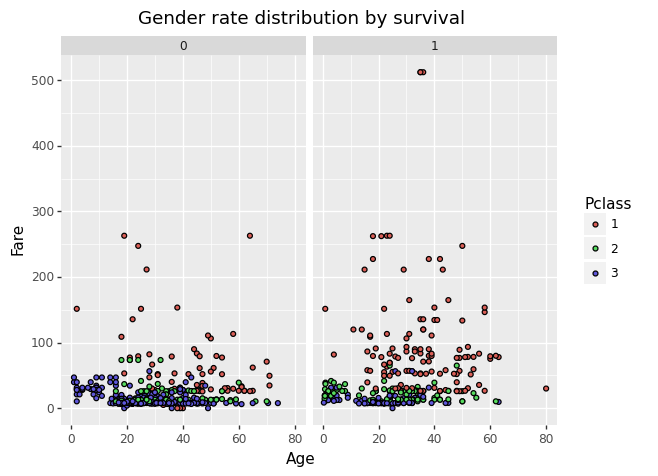

<ggplot: (8650173508473)>

In [34]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + ggtitle('Gender rate distribution by survival')
 + facet_wrap('~Survived')
 + theme(text=element_text(family='NanumBarunGothic'))
)

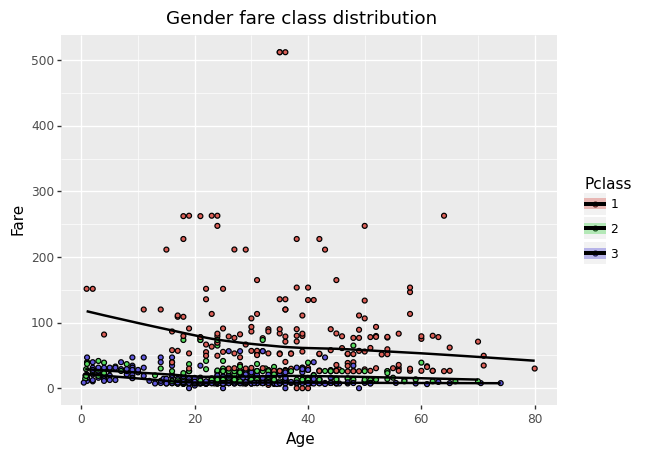

<ggplot: (8650167703501)>

In [35]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + stat_smooth()
 + ggtitle('Gender fare class distribution')
 + theme(text=element_text(family='NanumBarunGothic'))
)

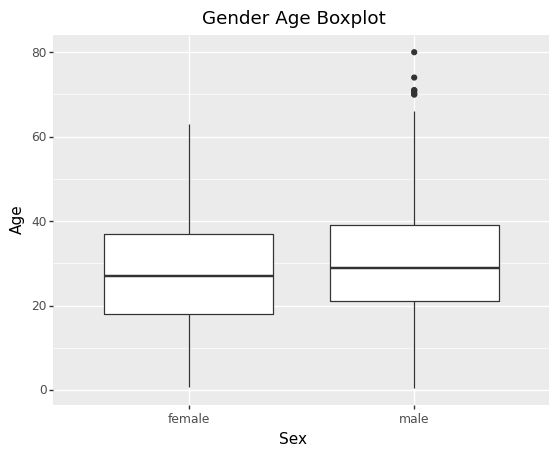

<ggplot: (8650167454976)>

In [36]:
# View correlation between age and fare gender
(ggplot(df_train) 
 + aes(x='Sex', y='Age')
 + geom_boxplot()
 + ggtitle('Gender Age Boxplot')
 + theme(text=element_text(family='NanumBarunGothic'))
)

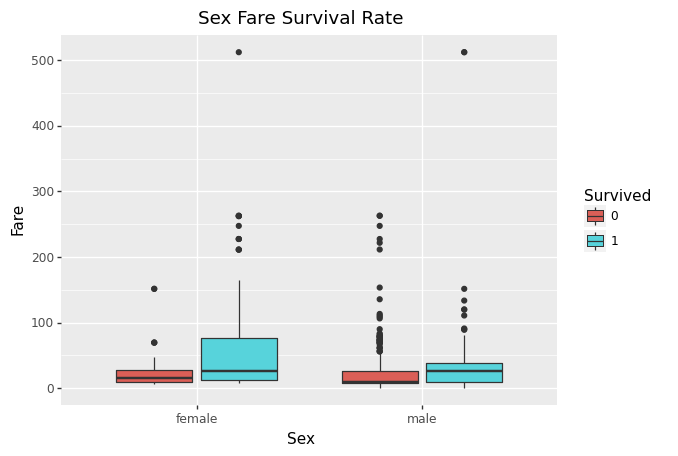

<ggplot: (8650167529533)>

In [37]:
(ggplot(df_train) 
 + aes(x='Sex', y='Fare', fill='Survived')
 + geom_boxplot()
 + ggtitle('Sex Fare Survival Rate')
 + theme(text=element_text(family='NanumBarunGothic'))
)

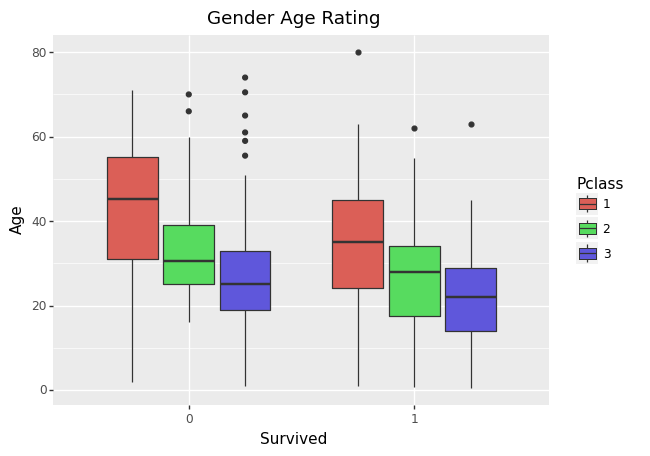

<ggplot: (8650167359990)>

In [38]:
(ggplot(df_train) 
 + aes(x='Survived', y='Age', fill='Pclass')
 + geom_boxplot()
 + ggtitle('Gender Age Rating')
 + theme(text=element_text(family='NanumBarunGothic'))
)

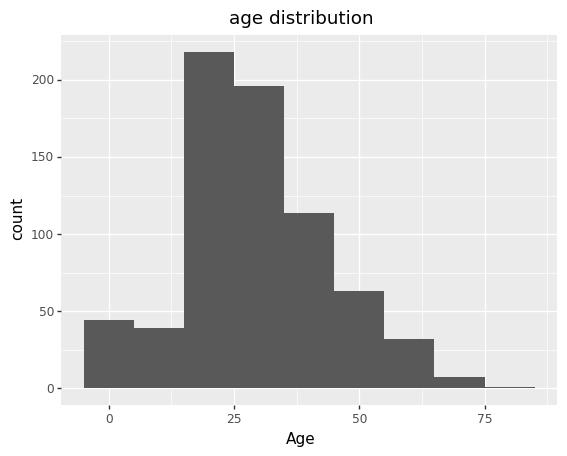

<ggplot: (8650167909319)>

In [39]:
(ggplot(df_train) 
 + aes(x='Age')
 + geom_histogram(binwidth=10)
 + ggtitle('age distribution')
 + theme(text=element_text(family='NanumBarunGothic'))
)

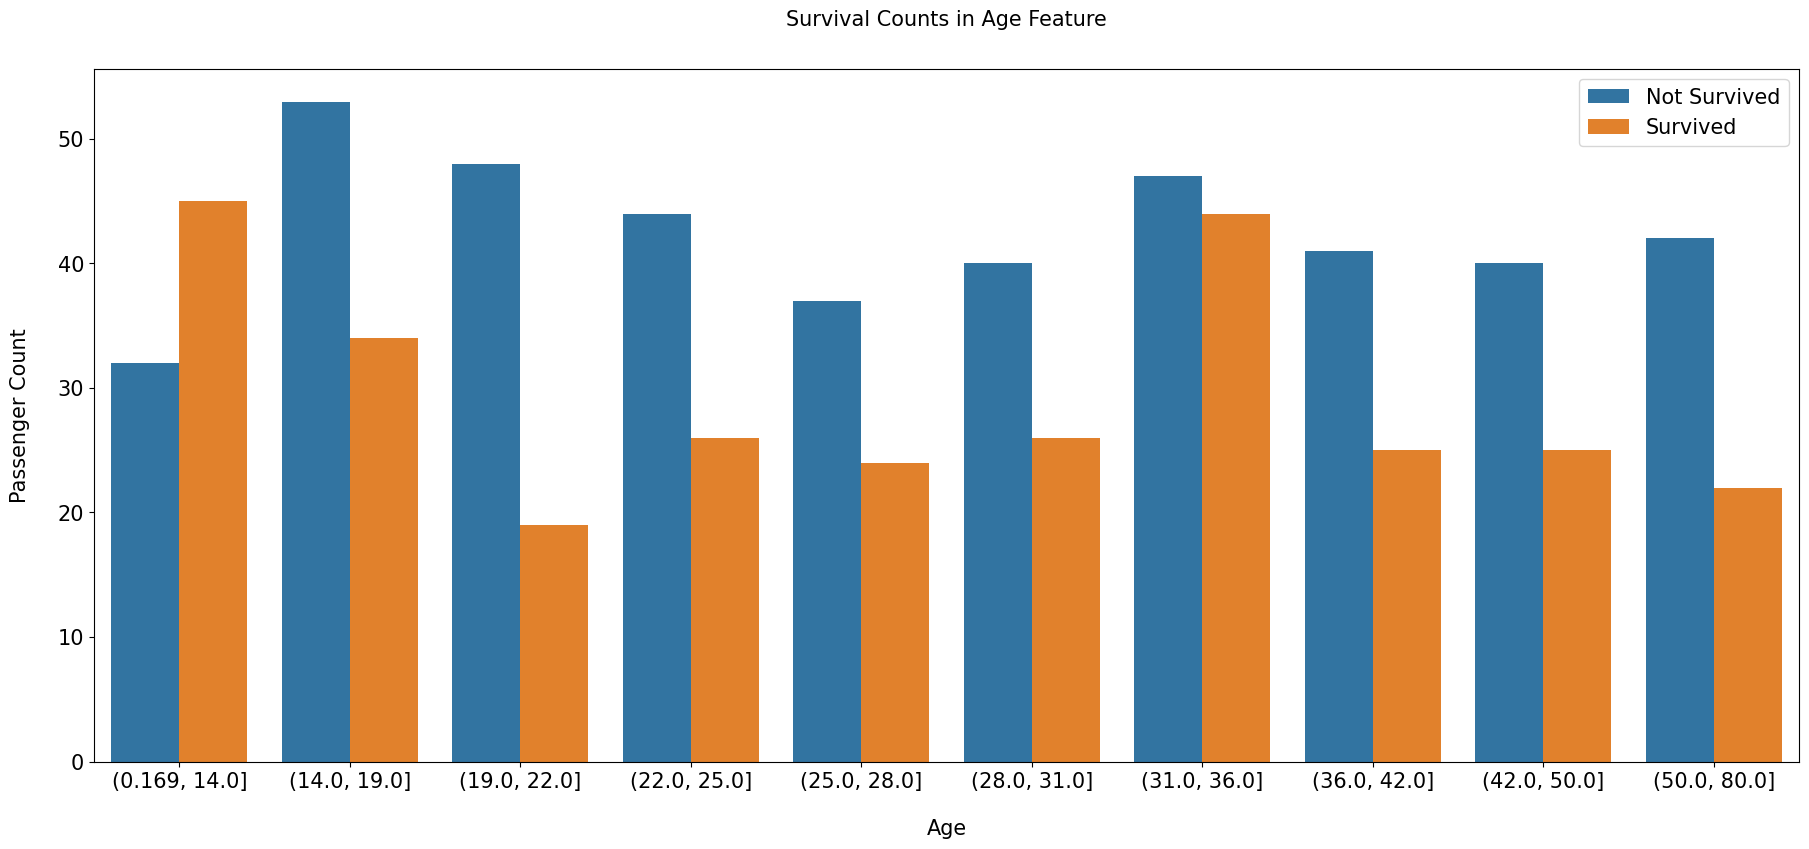

In [40]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

In [41]:
print('Oldest Passenger was of:',df_train['Age'].max(),'Years')
print('Youngest Passenger was of:',df_train['Age'].min(),'Years')
print('Average Age on the ship:',df_train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


- The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.
- Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.
- For males, the survival chances decreases with an increase in age.

* As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

* We can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [42]:
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [43]:

df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df_train.groupby('Initial')['Age'].mean()  # lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [44]:
# Assigning the NaN Values with the Ceil values of the mean ages
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46
df_train.Age.isnull().any()  # So no null values left finally 

False

# Dimensions and layout

# Cabin

* Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. We have two choices,

In [45]:
print("Train Cabin missing: " + str(df_train.Cabin.isnull().sum()/len(df_train.Cabin)))
print("Test Cabin missing: " + str(df_test.Cabin.isnull().sum()/len(df_test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [46]:
# print(df_all.info())
# Assign all the null values to N
df_all.Cabin.fillna("N", inplace=True)

# group these cabins according to the letter of the cabin name
df_all.Cabin = [str(i)[0] for i in df_all.Cabin]



def percent_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

percent_value_counts(df_all, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [47]:
df_all.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [48]:
def cabin_estimator(i):
   #Grouping cabin feature by the first letter
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a


In [49]:
#Give cabin names based on the means
#applying cabin estimator function. 
df_all['Cabin'] = df_all.Fare.apply(lambda x: cabin_estimator(x))

percent_value_counts(df_all, "Cabin")

,Total,Percent
G,714,54.55
F,201,15.36
C,143,10.92
T,109,8.33
B,72,5.50
A,37,2.83
E,27,2.06
D,6,0.46


In [50]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

In [51]:
def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages


In [52]:
def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

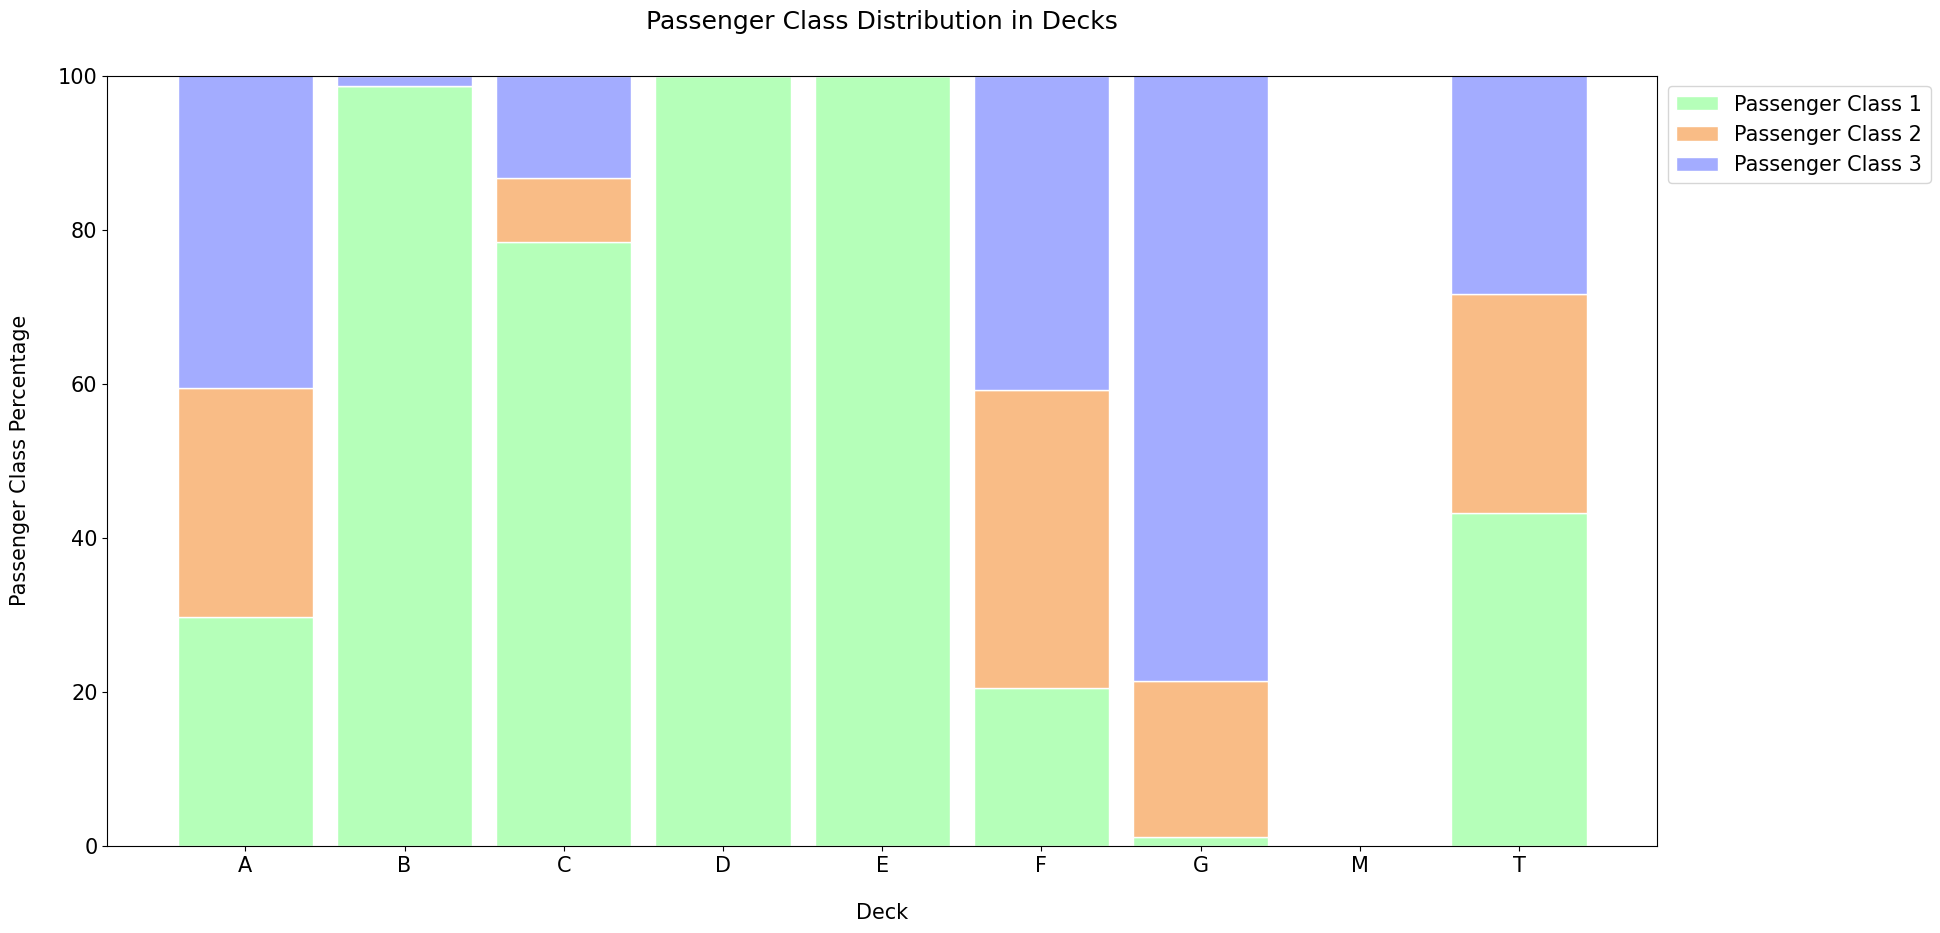

In [53]:
all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

In [54]:
# Passenger in the T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

In [55]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

In [56]:
def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

In [57]:
def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

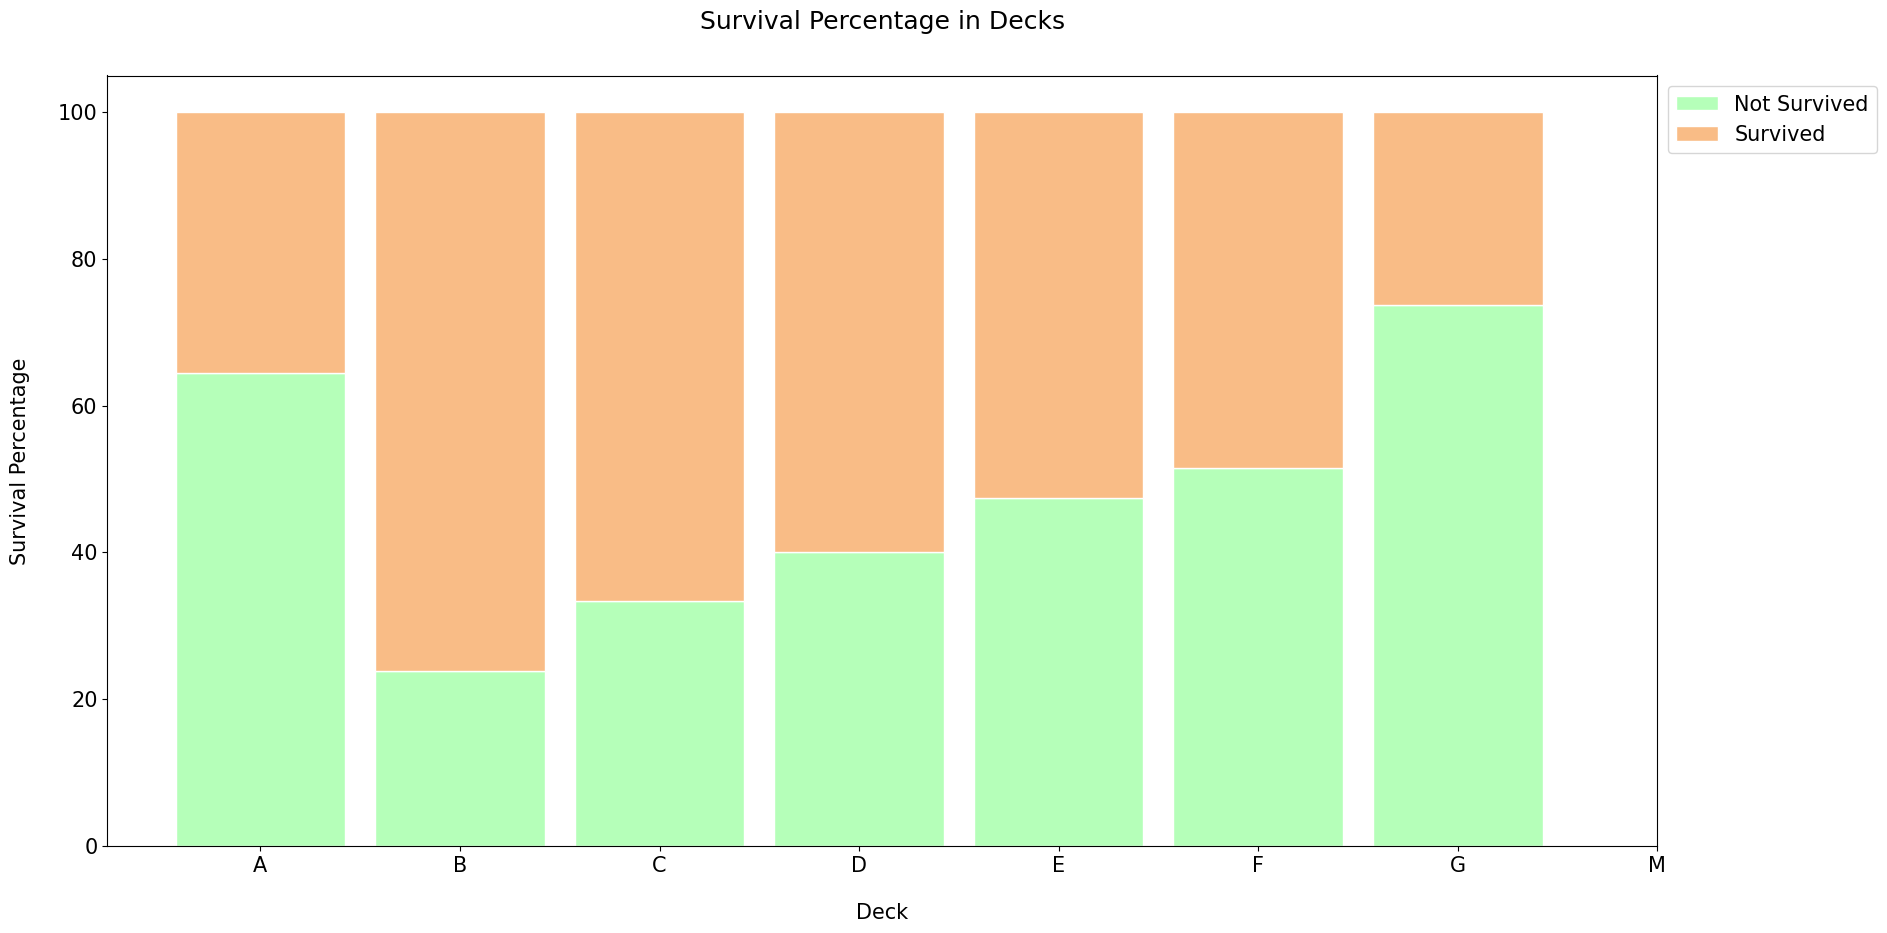

In [58]:
all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

# Working with Fare

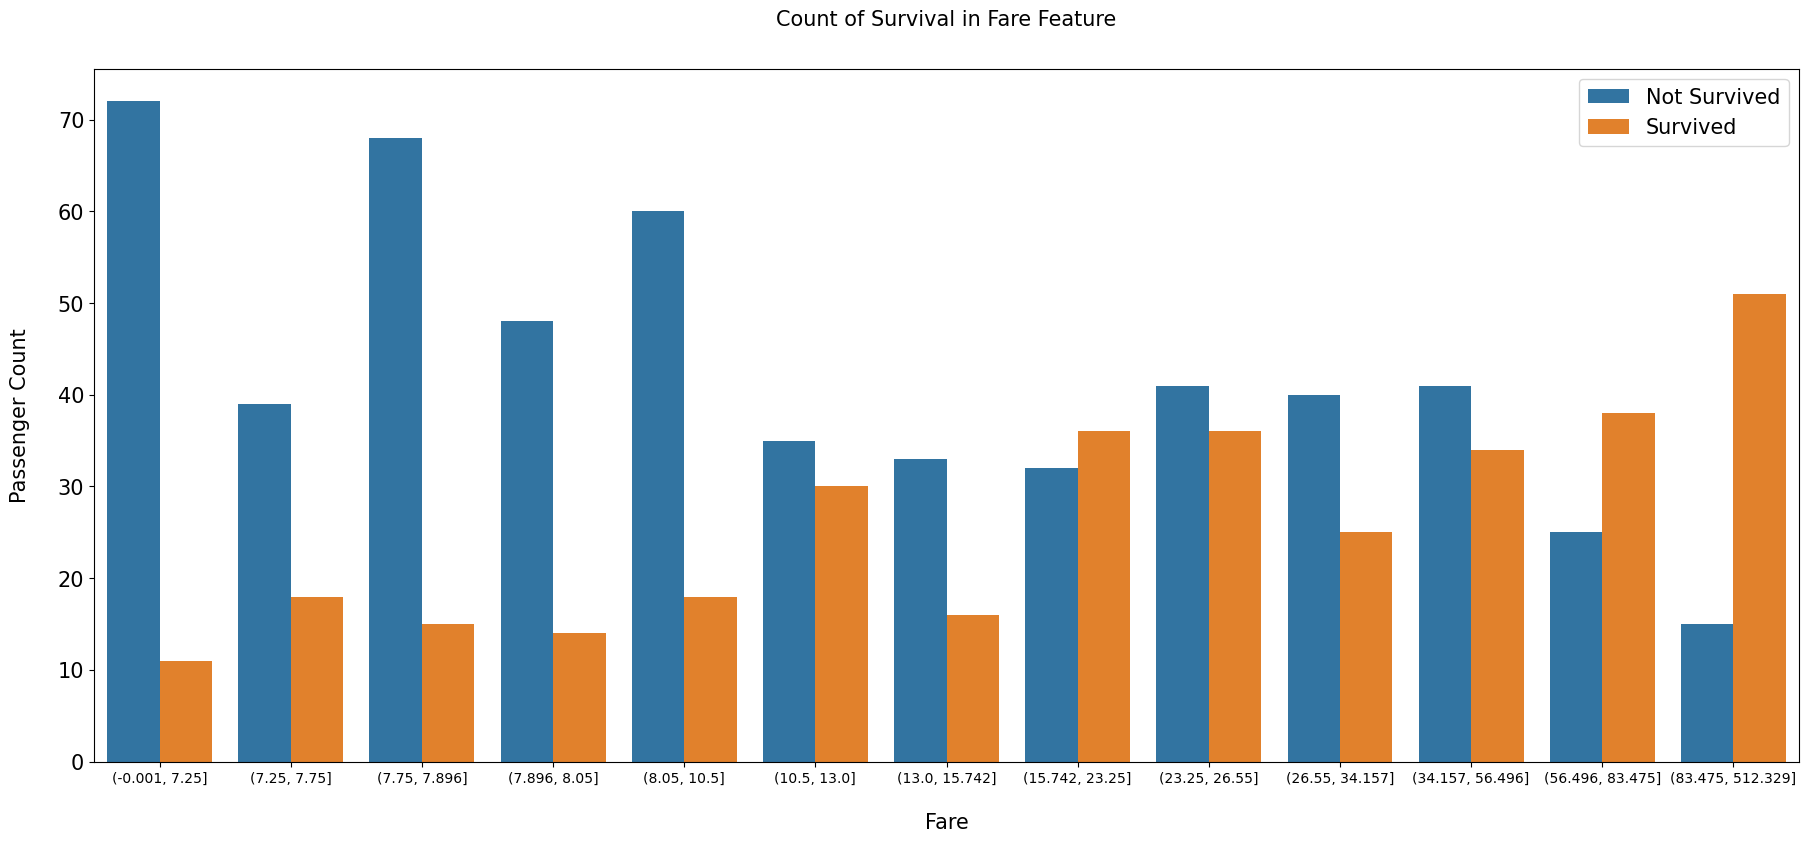

In [59]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

# Embarked

In [60]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
df_train[df_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [62]:
df_train['Embarked'].fillna('C', inplace = True)
df_train['Embarked'].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [63]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked
0,C
1,Q
2,S


In [64]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

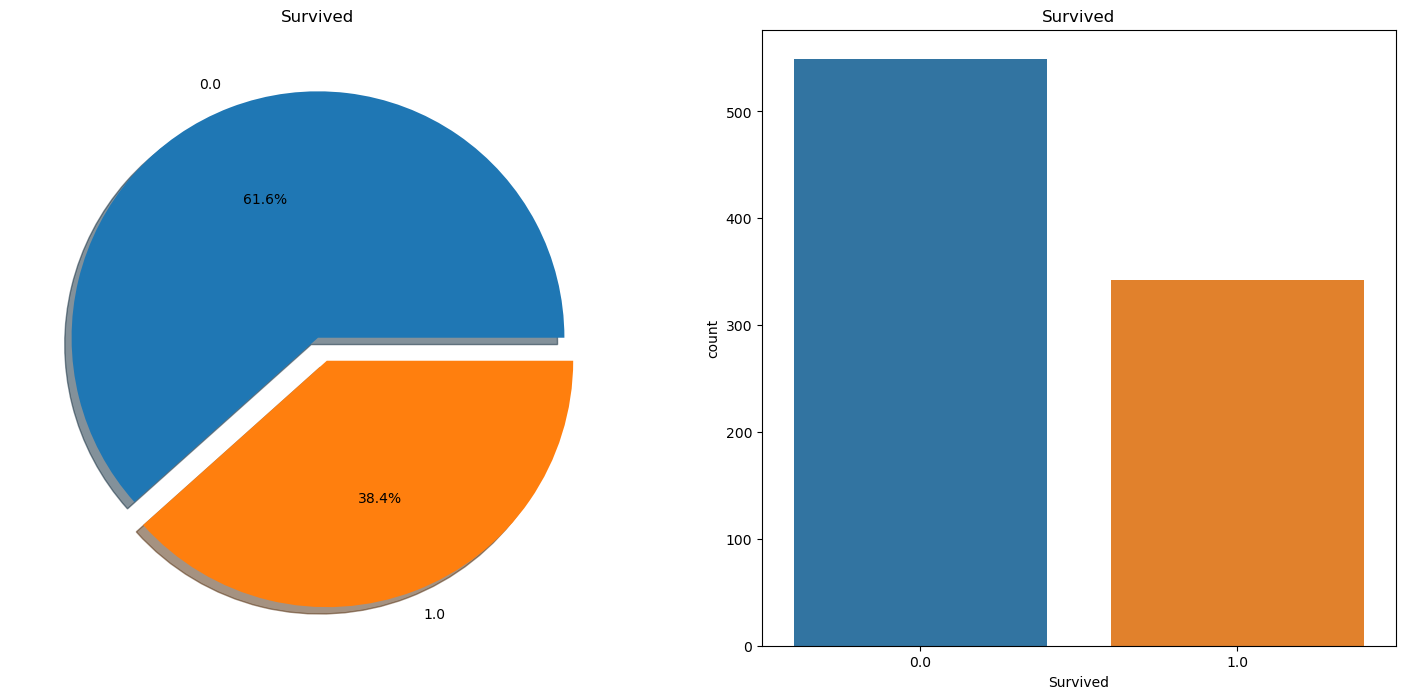

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_all['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data = df_all, x ='Survived', ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [66]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission.to_csv('submission.csv', index=False)